In [ ]:
### PROJECT 1 : IRIS Dataset ###

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Import Packages for 3D Graphs
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [ ]:
# 1. Chargez dans votre environnement le jeu de données IRIS, et représentez en trois dimensions (comme dans la Figure 1) les individus sur les axes
# suivants : Sepal.Length, Petal.Length, et Sepal.Width

# 1. Load IRIS dataset into your environment, and represent the individuals on the following axes in three dimensions 
# axes: Sepal.Length, Petal.Length, and Sepal.Width

In [2]:
# Open IRIS dataset
iris_df= pd.read_csv("C://Users//emmhu//OneDrive//Documents//E LEARNING//DU DATA ANALYST//3_RD & Clustering//Données//Datasets//iris.csv")
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# Convert 'variety' column to categorical type
iris_df['variety'] = pd.Categorical(iris_df['variety'])

In [4]:
# Separate features from the target variable
features = iris_df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
target = iris_df['variety'] # I keep 'variety' column to use it for legend later

In [5]:
# Create a PCA model with 3 components
pca= PCA(n_components= 3)
pca_result = pca.fit_transform(features)

In [6]:
# Create a dataframe from pca_result
pca_df_3d_unscaled= pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

pca_df_3d_unscaled.head()

,PC1,PC2,PC3
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079


In [7]:
# Add 'variety' column to use later forlegend
pca_df_3d_unscaled['variety']= target

# Create a color mapping dictionnary based on the variety
colors = {'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}

# Add a 'color' column
pca_df_3d_unscaled['color'] = pca_df_3d_unscaled['variety'].map(colors)

pca_df_3d_unscaled.head()

,PC1,PC2,PC3,variety,color
0,-2.684126,0.319397,-0.027915,Setosa,red
1,-2.714142,-0.177001,-0.210464,Setosa,red
2,-2.888991,-0.144949,0.017900,Setosa,red
3,-2.745343,-0.318299,0.031559,Setosa,red
4,-2.728717,0.326755,0.090079,Setosa,red


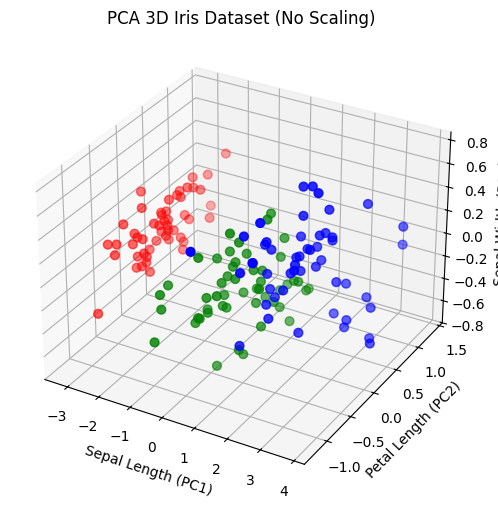

In [8]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')  # Correct way to create a 3D subplot

# Scatter plot
ax.scatter(pca_df_3d_unscaled["PC1"], 
           pca_df_3d_unscaled["PC2"], 
           pca_df_3d_unscaled["PC3"], 
           c=pca_df_3d_unscaled['color'],  # Color based on variety
           s=40, 
           depthshade=True)

# Add labels
ax.set_xlabel('Sepal Length (PC1)')
ax.set_ylabel('Petal Length (PC2)')
ax.set_zlabel('Sepal Width (PC3)')
ax.set_title('PCA 3D Iris Dataset (No Scaling)')

# Show the plot
plt.show()

In [ ]:
# 2. Répétez l’étape précédente, mais après avoir centré puis réduit les variables correspondantes

# 2. Repeat the previous step, but after centring and reducing the corresponding variables

In [9]:
# Standardizing features (centring and reducing)
scaler= StandardScaler()
scaled_features= scaler.fit_transform(features)

In [10]:
# Create a PCA model with 3 components
pca= PCA(n_components= 3)

pca_result= pca.fit_transform(scaled_features)

In [11]:
# Create a dataframe from pca_result
pca_df_3d_scaled= pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])


pca_df_3d_scaled.head()

,PC1,PC2,PC3
0,-2.264703,0.480027,0.127706
1,-2.080961,-0.674134,0.234609
2,-2.364229,-0.341908,-0.044201
3,-2.299384,-0.597395,-0.091290
4,-2.389842,0.646835,-0.015738


In [12]:
# Add 'variety' column to use later for legend
pca_df_3d_scaled['variety']= target

# Create a color mapping dictionnary based on the variety
colors = {'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}

# Add a 'color' column
pca_df_3d_scaled['color'] = pca_df_3d_scaled['variety'].map(colors)

pca_df_3d_scaled.head()

,PC1,PC2,PC3,variety,color
0,-2.264703,0.480027,0.127706,Setosa,red
1,-2.080961,-0.674134,0.234609,Setosa,red
2,-2.364229,-0.341908,-0.044201,Setosa,red
3,-2.299384,-0.597395,-0.091290,Setosa,red
4,-2.389842,0.646835,-0.015738,Setosa,red


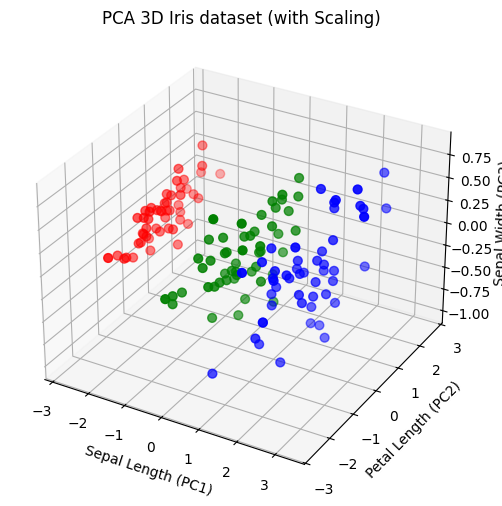

In [13]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')  # Correct way to create a 3D subplot

# Scatter plot
ax.scatter(pca_df_3d_scaled["PC1"], 
           pca_df_3d_scaled["PC2"], 
           pca_df_3d_scaled["PC3"], 
           c=pca_df_3d_scaled['color'],  # Color based on variety
           s=40, 
           depthshade=True)

# Add labels
ax.set_xlabel('Sepal Length (PC1)')
ax.set_ylabel('Petal Length (PC2)')
ax.set_zlabel('Sepal Width (PC3)')
ax.set_title('PCA 3D Iris dataset (with Scaling)')


plt.show()

In [ ]:
# 3. Réalisez une analyse en composantes principales, puis affichez les individus sur les deux premières composantes. 
# Vous choisirez des couleurs différentes selon le type d’espèce d’iris considéré, comme en Figure 2. 
# Vous réaliserez cette étape en deux fois : une première fois sans standardisation des données, une seconde fois avec. 
# A partir de maintenant, vous travaillerez toujours avec les variables centrées réduites.

# 3. Perform a principal component analysis, then display the individuals on the first two components. 
# You will choose different colours according to the type of iris species considered, as in Figure 2. 
# Carry out this step twice: once without standardising the data, and once with. 
# From now on, you will always work with reduced centred variables.

In [14]:
# Create a PCA model with 2 components
pca= PCA(n_components= 2)
pca_result = pca.fit_transform(features)

In [15]:
# Create a dataframe from pca_result
pca_df_2d_unscaled= pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df_2d_unscaled['variety'] = target  # Add 'variety' column for legend

pca_df_2d_unscaled.head()

,PC1,PC2,variety
0,-2.684126,0.319397,Setosa
1,-2.714142,-0.177001,Setosa
2,-2.888991,-0.144949,Setosa
3,-2.745343,-0.318299,Setosa
4,-2.728717,0.326755,Setosa


In [19]:
# Create a 2D scatter plot using Plotly for PCA without standardization (version 1)
fig = px.scatter(
    pca_df_2d_unscaled, 
    x='PC1', 
    y='PC2',
    color='variety',  # Use the original variety for colors
    title='PCA 2D Iris dataset (No Standadization)',
    labels={'PC1': 'sepal length', 'PC2': 'petal length'},
    color_discrete_sequence=px.colors.qualitative.Set1  # Use a qualitative color scale
)

# Show the plot
fig.show()

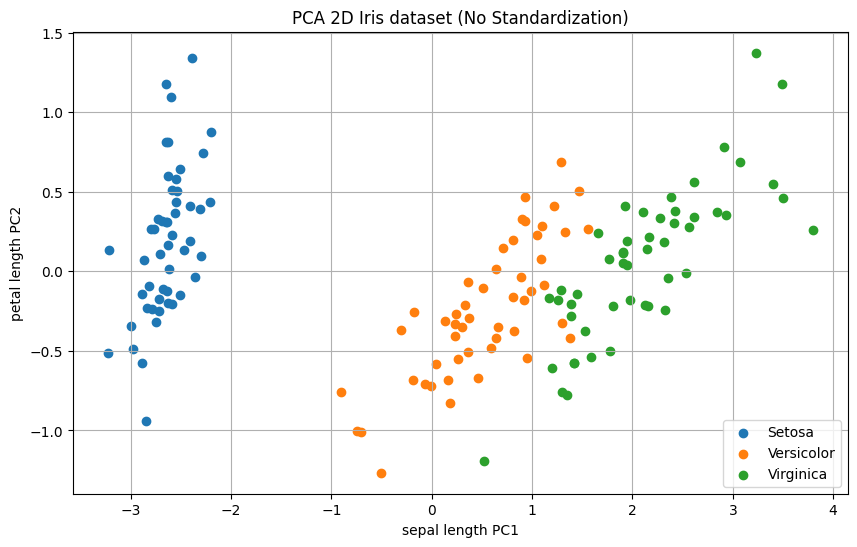

In [18]:
# Create a 2D scatter plot of PCA without Plotly and without standardization (version 2)
plt.figure(figsize=(10, 6))
for variety in pca_df_2d_unscaled['variety'].cat.categories:
    subset = pca_df_2d_unscaled[pca_df_2d_unscaled['variety'] == variety]
    plt.scatter(subset['PC1'], subset['PC2'], label=variety)

plt.xlabel('sepal length PC1')
plt.ylabel('petal length PC2')
plt.title('PCA 2D Iris dataset (No Standardization)')
plt.legend()
plt.grid()

plt.show()

In [20]:
# Standardizing features (centring and reducing)
scaler= StandardScaler()
scaled_features= scaler.fit_transform(features)

In [21]:
# Create PCA model with 2 components
pca= PCA(n_components= 2)
pca_result = pca.fit_transform(scaled_features)

In [22]:
# Create a dataframe from pca_result
pca_df_2d_scaled= pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df_2d_scaled['variety'] = target  # # Add 'variety' column for legend

pca_df_2d_scaled.head()

,PC1,PC2,variety
0,-2.264703,0.480027,Setosa
1,-2.080961,-0.674134,Setosa
2,-2.364229,-0.341908,Setosa
3,-2.299384,-0.597395,Setosa
4,-2.389842,0.646835,Setosa


In [23]:
# Create a 2D scatter plot using Plotly for PCA with standardization (version 1)
fig = px.scatter(
    pca_df_2d_scaled, 
    x='PC1', 
    y='PC2',
    color='variety',  # Use the original variety for colors
    title='PCA 2D Iris dataset',
    labels={'PC1': 'sepal length', 'PC2': 'petal length'},
    color_discrete_sequence=px.colors.qualitative.Set1  # Use a qualitative color scale
)

# Show the plot
fig.show()

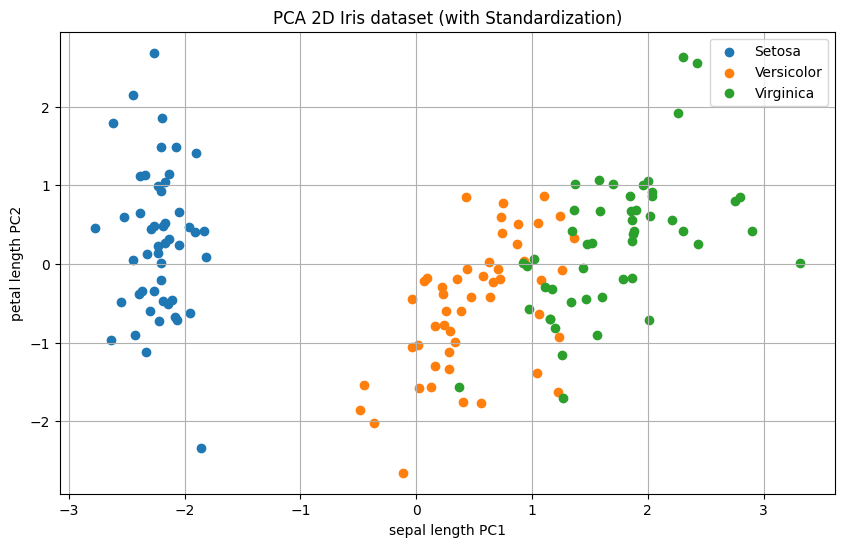

In [25]:
# Create a 2D scatter plot of PCA without Plotly, with standardization (version 2)
plt.figure(figsize=(10, 6))
for variety in pca_df_2d_scaled['variety'].cat.categories:
    subset = pca_df_2d_scaled[pca_df_2d_scaled['variety'] == variety]
    plt.scatter(subset['PC1'], subset['PC2'], label=variety)

plt.xlabel('sepal length PC1')
plt.ylabel('petal length PC2')
plt.title('PCA 2D Iris dataset (with Standardization)')
plt.legend()
plt.grid()

plt.show()

In [ ]:
# 4. Calculez deux à deux les corrélations entre les différentes variables du jeu de données (en anglais : pairwise correlations). 
# Représentez ces corrélations sous la forme d’un corrélogramme de votre choix (par ex., avec des bulles et des couleurs). 
# L’objectif est de vous montrer la difficulté à représenter de cette manière l’intégralité des relations entre variables.

# 4. Calculate the pairwise correlations between the different variables in the dataset. 
# Represent these correlations in the form of a correlogram of your choice (e.g. with bubbles and colours). 
# The aim is to show you how difficult it is to represent all the relationships between variables in this way.

In [26]:
from scipy.stats import pearsonr

In [27]:
# Standardizing features (centring and reducing)
scaler= StandardScaler()
scaled_features= scaler.fit_transform(features)

In [28]:
# Create a PCA model with 3 components
pca= PCA(n_components= 3)

pca_result= pca.fit_transform(scaled_features)

In [29]:
# Create a dataframe from pca_result
correlation_df_3= pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

correlation_df_3.head()

,PC1,PC2,PC3
0,-2.264703,0.480027,0.127706
1,-2.080961,-0.674134,0.234609
2,-2.364229,-0.341908,-0.044201
3,-2.299384,-0.597395,-0.091290
4,-2.389842,0.646835,-0.015738


In [30]:
# Calculate correlation matrix for all PCA pairs
correlation_matrix = correlation_df_3.corr()

In [31]:
# Print the correlation matrix
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
               PC1           PC2           PC3
PC1  1.000000e+00  2.117851e-16  6.333271e-17
PC2  2.117851e-16  1.000000e+00 -1.091935e-15
PC3  6.333271e-17 -1.091935e-15  1.000000e+00


In [32]:
# Original values
values = [2.117851e-16, 6.333271e-17, -1.091935e-15]

# Convert to a more readable format (scientific notation with 2 decimal places)
readable_values_sci = [f"{v:.2e}" for v in values]

# Convert to decimal format for very small values
readable_values_decimal = [f"{v:.10f}" for v in values]

print("Scientific Notation:", readable_values_sci)
print("Decimal Format:", readable_values_decimal)

Scientific Notation: ['2.12e-16', '6.33e-17', '-1.09e-15']
Decimal Format: ['0.0000000000', '0.0000000000', '-0.0000000000']


In [ ]:
## Components of the Correlation Matrix

#Diagonal Values:

    # 1. The diagonal elements of the matrix (1.000000e+00) represent the correlation of each principal component with itself. A 
    # correlation of 1 indicates a perfect positive correlation. Therefore, PC1 is perfectly correlated with PC1, PC2 with PC2, and PC3 with PC3.

    # 2. Off-Diagonal Values:

        # The off-diagonal values indicate the correlation between different principal components:
            # PC1 and PC2: The value 2.117851e-16 indicates an extremely low correlation (close to 0). 
            # This suggests that PC1 and PC2 are essentially uncorrelated, meaning they capture different aspects of the data variability.
            # PC1 and PC3: The value 6.333271e-17 also indicates a very low correlation, reinforcing the idea that PC1 and PC3 are largely uncorrelated.
            # PC2 and PC3: The value -1.091935e-15 is similarly close to zero, indicating that PC2 and PC3 are also uncorrelated.

            # Manually Simplified:
                # PC1 and PC2: 2.12 X 10−16
                # PC1 and PC3: 6.33 X 10−17
                # PC2 and PC3: −1.09 X 10−15

            # Or, with decimal:
                # PC1 and PC2: 0.000000000000000212
                # PC1 and PC3: 0.0000000000000000633
                # PC2 and PC3: -0.00000000000000109


## Interpretation

    # Low Correlation Between Components: The very small correlation values suggest that the first three principal components each represent different dimensions
    # of variability in the data. This is a desirable outcome in PCA, as it indicates that the components provide unique information about the dataset.

    # Dimensionality Reduction: Since the principal components are largely uncorrelated, using fewer components to represent the data is reasonable. 
    # In this case, even just using the first two components (PC1 and PC2) might capture most of the important variability in the data
    # without losing much information.

## Summary

    # Values close to 1: Strong positive correlation.
    # Values close to -1: Strong negative correlation.
    # Values around 0: Little to no linear correlation.

# In your correlation matrix, the off-diagonal values close to zero indicate that the principal components are capturing different aspects of the data, 
# allowing for effective dimensionality reduction without significant loss of information. 


In [33]:
# Pearson correlation between features (by pair) : Assigner la colonne PC1 du dataframe correlation_df_3 : sepal length
sepal_length_pc1= correlation_df_3["PC1"]

# Pearson correlation between features (by pair): Assigner la colonne PC2 du dataframe correlation_df_3 : petal length
petal_length_pc2= correlation_df_3["PC2"]


In [34]:
# Calculate Pearson correlation for sepal length (PC1) VS petal length (PC2)
correlation, pvalue= pearsonr(correlation_df_3["PC1"],correlation_df_3["PC2"])

print(correlation, pvalue)

2.4214300269748135e-16 0.9999999999999994


In [35]:
# Add 'variety' column to use later as legend
correlation_df_3['variety']= target

# Create a color mapping dictionnary based on the variety
colors = {'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}

# Add a 'color' column 
correlation_df_3['color'] = correlation_df_3['variety'].map(colors)

correlation_df_3.head()

,PC1,PC2,PC3,variety,color
0,-2.264703,0.480027,0.127706,Setosa,red
1,-2.080961,-0.674134,0.234609,Setosa,red
2,-2.364229,-0.341908,-0.044201,Setosa,red
3,-2.299384,-0.597395,-0.091290,Setosa,red
4,-2.389842,0.646835,-0.015738,Setosa,red


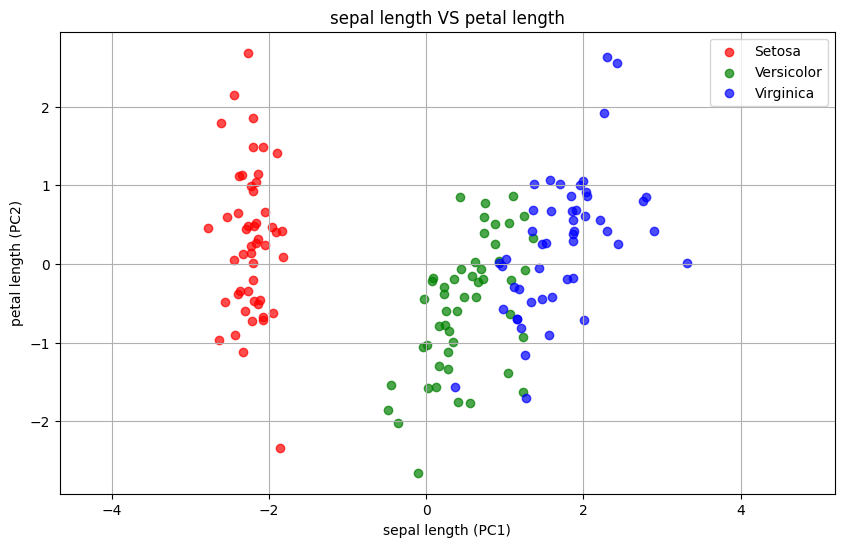

In [36]:
# Create a scatter plot sepal length VS petal length
plt.figure(figsize=(10, 6))
for variety, color in colors.items():
    subset = correlation_df_3[correlation_df_3['variety'] == variety]
    plt.scatter(subset["PC1"],subset["PC2"],label=variety,color=color,alpha=0.7)

plt.axis('equal')

plt.title('sepal length VS petal length')
plt.xlabel('sepal length (PC1)')
plt.ylabel('petal length (PC2)')
plt.legend()
plt.grid()

plt.show()

In [37]:
# Correlation Pearson between features (by pair): Assigner la colonne PC3 du dataframe correlation_df_3 : sepal width
petal_width_pc3= correlation_df_3["PC3"]

In [38]:
# Calculate Pearson correlation for sepal length (PC1) VS sepal width (PC3) pair
correlation, pvalue= pearsonr(correlation_df_3["PC1"],correlation_df_3["PC3"])

print(correlation, pvalue)

7.37257477290143e-17 0.9999999999999991


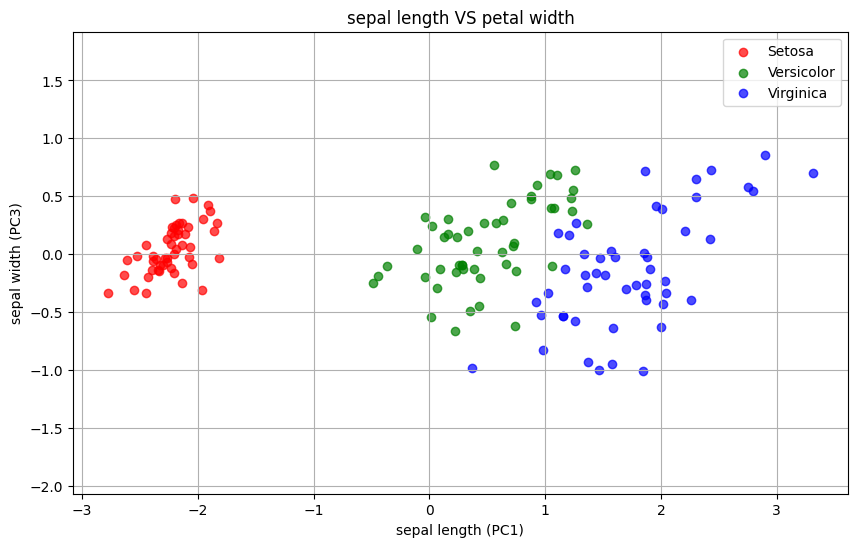

In [39]:
# Create a scatter plot of sepal length VS sepal length
plt.figure(figsize=(10, 6))
for variety, color in colors.items():
    subset = correlation_df_3[correlation_df_3['variety'] == variety]
    plt.scatter(subset["PC1"], subset["PC3"], label=variety, color=color, alpha=0.7)

plt.axis('equal')

plt.title('sepal length VS petal width')
plt.xlabel('sepal length (PC1)')
plt.ylabel('sepal width (PC3)')
plt.legend()
plt.grid()

plt.show()

In [40]:
# Calculate Pearson correlation for petal length (PC2) VS sepal width (PC3) pair
correlation, pvalue= pearsonr(correlation_df_3["PC2"],correlation_df_3["PC3"])

print(correlation, pvalue)

-1.079187737437759e-15 0.9999999999999896


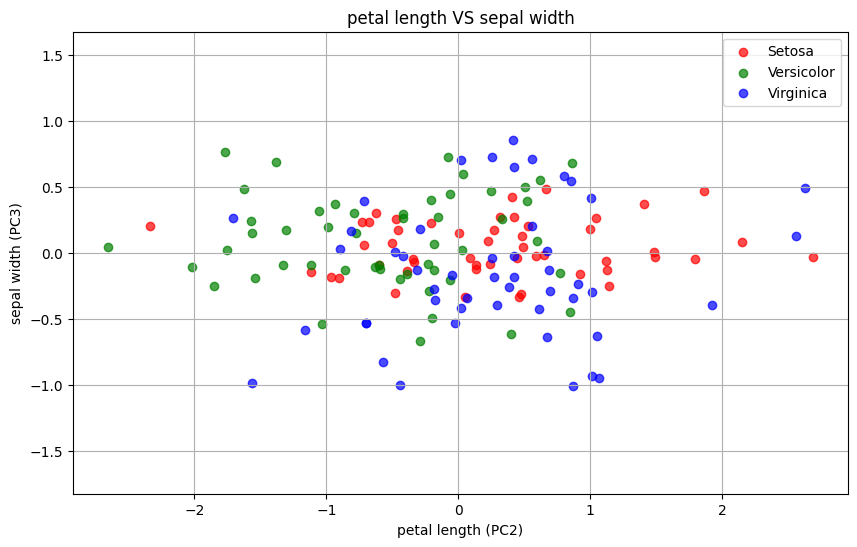

In [41]:
# Create a scatter plot for petal length VS petal width
plt.figure(figsize=(10, 6))
for variety, color in colors.items():
    subset = correlation_df_3[correlation_df_3['variety'] == variety]
    plt.scatter(subset["PC2"], subset["PC3"], label=variety, color=color, alpha=0.7)

plt.axis('equal')

plt.title('petal length VS sepal width')
plt.xlabel('petal length (PC2)')
plt.ylabel('sepal width (PC3)')
plt.legend()
plt.grid()

plt.show()

In [ ]:
# 5. Représentez maintenant avec Iris un cercle des corrélations. Quelles sont les variables qui semble les plus corréléees, d’après ce que vous avez 
# obtenu à l’étape précédente, et comment cette forte corrélation se matérialise-t-elle dans le cercle des corrélations ?

# 5. Use Iris to draw a correlation circle. Which variables appear to be the most correlated, according to what you have 
# obtained in the previous step, and how does this strong correlation appear in the correlation circle ?

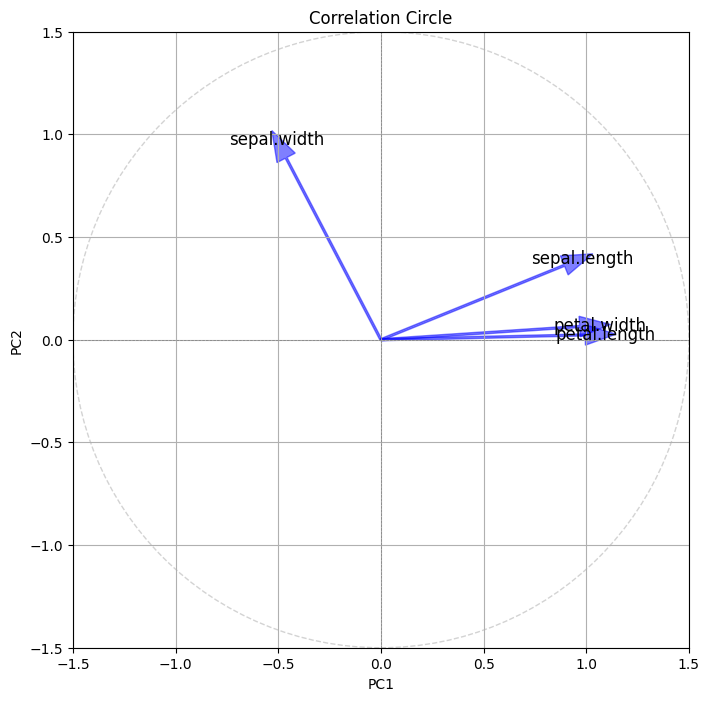

In [42]:
# Separate the features and the target variable
features = iris_df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
target = iris_df['variety']  # Assuming 'variety' is the column name for species

# Standardizing features (centring and reducing)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['variety'] = target  # Add the original variety for labeling

# Calculate loadings for the PCA
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=features.columns, columns=['PC1', 'PC2'])

# Plotting the correlation circle
def plot_correlation_circle(loadings_df):
    plt.figure(figsize=(8, 8))
    
    # Create the circle
    circle = plt.Circle((0, 0),1.5, color='lightgrey', fill=False, linestyle='--')
    plt.gca().add_artist(circle)

    # Plot loadings
    for i in range(loadings_df.shape[0]):
        plt.arrow(0, 0, loadings_df.iloc[i, 0], loadings_df.iloc[i, 1],
                  color='b', alpha=0.5, width=0.01, head_width=0.1)
        plt.text(loadings_df.iloc[i, 0] * 1.1, loadings_df.iloc[i, 1] * 1.1, loadings_df.index[i],
                 fontsize=12, ha='center', va='center')

    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.title('Correlation Circle')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig('correlation_circle.png')  # Save the figure
    plt.show()

# Call the function to plot the correlation circle
plot_correlation_circle(loadings_df)


In [ ]:
# 6. Représentez cette fois le biplot, avec a la fois les variables, et les individus. Quelle part de la variance est-elle représentée 
#  sur le plan représenté ?

# 6. Represent the biplot, with both the variables and the individuals. How much of the variance is represented 
# on the plane represented?

In [43]:
# Add 'variety' column to use later as legend
pca_df['variety']= target

In [44]:
# Create a dictionnary of color mapping based on variety
colors = {'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}

pca_df.head()

,PC1,PC2,variety
0,-2.264703,0.480027,Setosa
1,-2.080961,-0.674134,Setosa
2,-2.364229,-0.341908,Setosa
3,-2.299384,-0.597395,Setosa
4,-2.389842,0.646835,Setosa


In [45]:
import matplotlib.patches as mpatches

In [46]:
# Standardizing features (centring and reducing)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['variety'] = target  # Add the original variety for labeling

print(pca_df.head())

# Calculate loadings for the PCA
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=features.columns, columns=['PC1', 'PC2'])

print(loadings_df.head())

        PC1       PC2 variety
0 -2.264703  0.480027  Setosa
1 -2.080961 -0.674134  Setosa
2 -2.364229 -0.341908  Setosa
3 -2.299384 -0.597395  Setosa
4 -2.389842  0.646835  Setosa
                   PC1       PC2
sepal.length  0.893151  0.362039
sepal.width  -0.461684  0.885673
petal.length  0.994877  0.023494
petal.width   0.968212  0.064214


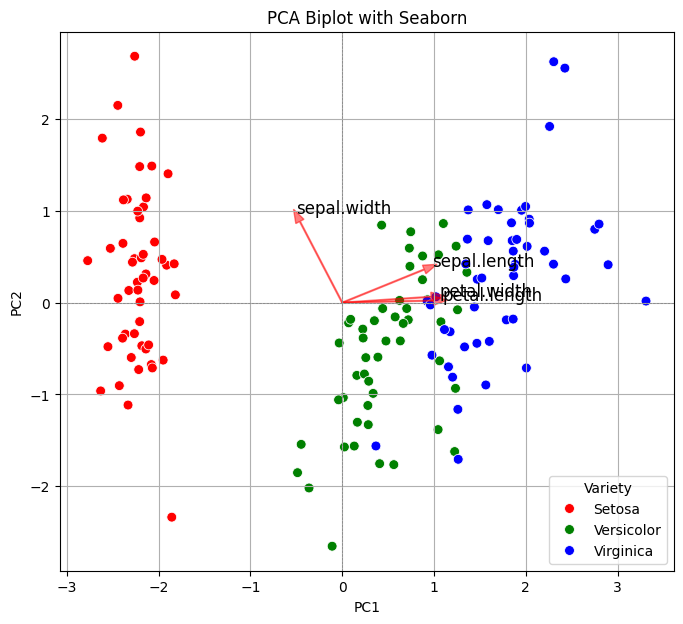

In [47]:
# Create a biplot (version 1)
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['variety'], palette=colors, s=50)

# Add arrows for loadings (variables)
for i in range(loadings_df.shape[0]):
    plt.arrow(0, 0, loadings_df.iloc[i, 0], loadings_df.iloc[i, 1], 
              color='red', alpha=0.5, width=0.01, head_width=0.1)
    plt.text(loadings_df.iloc[i, 0] * 1.1, loadings_df.iloc[i, 1] * 1.1, 
             loadings_df.index[i], fontsize=12)

# Add labels and title
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.title('PCA Biplot with Seaborn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.gca().set_aspect('equal')
plt.legend(title='Variety')
plt.show()

C:\Users\emmhu\AppData\Local\Temp\ipykernel_25092\747230580.py:53: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



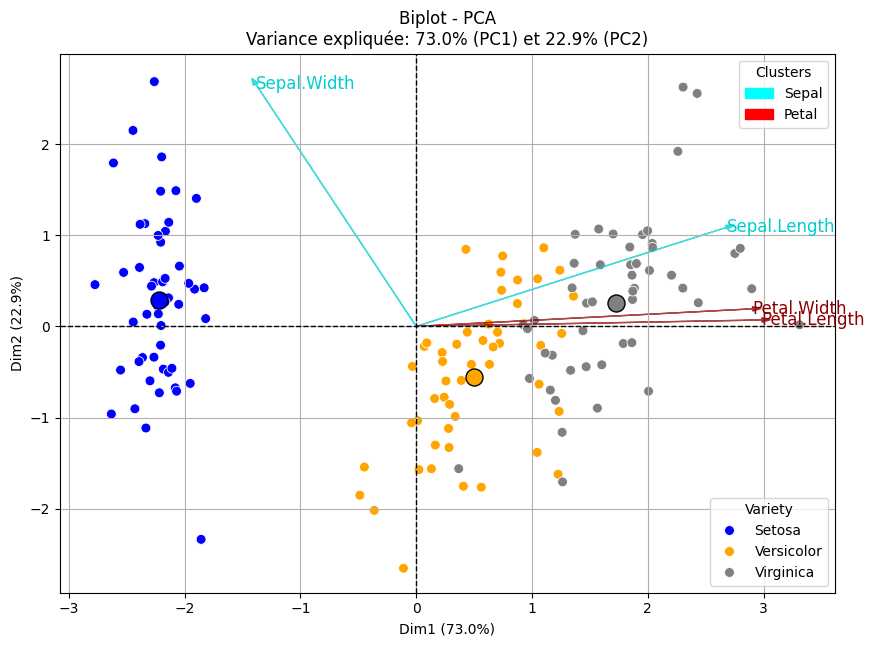

In [ ]:
## Create biplot with seaborn (version 2)

# Selecting required variables
features = iris_df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]

# Create a color palette
palette_couleur = ['Blue', 'orange', 'gray']

# Standardizing features (centring and reducing)
scaled_features = StandardScaler().fit_transform(features)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Récupération des composantes principales
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame from PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['variety'] = iris_df['variety']

# Facteur d'échelle pour maximiser la visibilité des vecteurs
scale_factor = 3

# Création du biplot
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['variety'], palette=palette_couleur, s=50)

# Ajout des flèches pour les vecteurs des variables
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

for i, name in enumerate(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']):
    ncolor = 'DarkRed'
    if 'Sepal' in name:
        ncolor = 'DarkTurquoise'
        
    plt.arrow(0, 0, loadings[i, 0] * scale_factor, loadings[i, 1] * scale_factor, color=ncolor, alpha=0.7, head_width=0.05)
    plt.text(loadings[i, 0] * scale_factor, loadings[i, 1] * scale_factor, name, color=ncolor, fontsize=12, ha='left', va='center')

# Ajout de la légende pour les clusters de variables (Sepal/Petal)
sepal_patch = mpatches.Patch(color='cyan', label='Sepal')
petal_patch = mpatches.Patch(color='red', label='Petal')

# Ajouter la légende variety sans la remplacer
legend1 = plt.legend(handles=[sepal_patch, petal_patch], title="Clusters", loc="upper right")

# Ajouter la légende pour les variétés gérée par seaborn
scatter.legend(title='Variety', loc='lower right')

# Calcul des centroïdes pour chaque variété
centroids = pca_df.groupby('variety').mean()

# Tracé des centroïdes
for (variety, centroid), couleurc in zip(centroids.iterrows(), palette_couleur):
    plt.scatter(centroid['PC1'], centroid['PC2'], c=couleurc, s=150, marker='o', edgecolor='k')

# Ajout des titres et annotations
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title(f'Biplot - PCA\nVariance expliquée: {explained_variance[0]*100:.1f}% (PC1) et {explained_variance[1]*100:.1f}% (PC2)')
plt.xlabel(f'Dim1 ({explained_variance[0]*100:.1f}%)')
plt.ylabel(f'Dim2 ({explained_variance[1]*100:.1f}%)')
plt.grid(True)

# Affichage des deux légendes
plt.gca().add_artist(legend1)

plt.show()

In [50]:
# Create a PCA model with 4 components
pca= PCA(n_components= 4)
pca_result = pca.fit_transform(features)

# Display the PCA variance
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.22824171 0.24267075 0.0782095  0.02383509]
[0.92461872 0.05306648 0.01710261 0.00521218]


In [51]:
# Display explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by PC1: {explained_variance[0]:.4f}')
print(f'Explained variance by PC2: {explained_variance[1]:.4f}')


print(f'Total variance explained: {np.sum(explained_variance):.4f}')

Explained variance by PC1: 0.9246
Explained variance by PC2: 0.0531
Total variance explained: 1.0000


In [52]:
# Create a dataframe to summarize the variance
variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_))],
    'Explained Variance': pca.explained_variance_,
    'Explained Variance Ratio': pca.explained_variance_ratio_
})

print(variance_df)

  Principal Component  Explained Variance  Explained Variance Ratio
0                 PC1            4.228242                  0.924619
1                 PC2            0.242671                  0.053066
2                 PC3            0.078210                  0.017103
3                 PC4            0.023835                  0.005212


In [54]:
from sklearn.pipeline import make_pipeline

In [56]:
# Set PCA to retain all components
pca = PCA(n_components=4)
pca.fit(features)  # features is iris dataset selected variables

PCA(n_components=4)

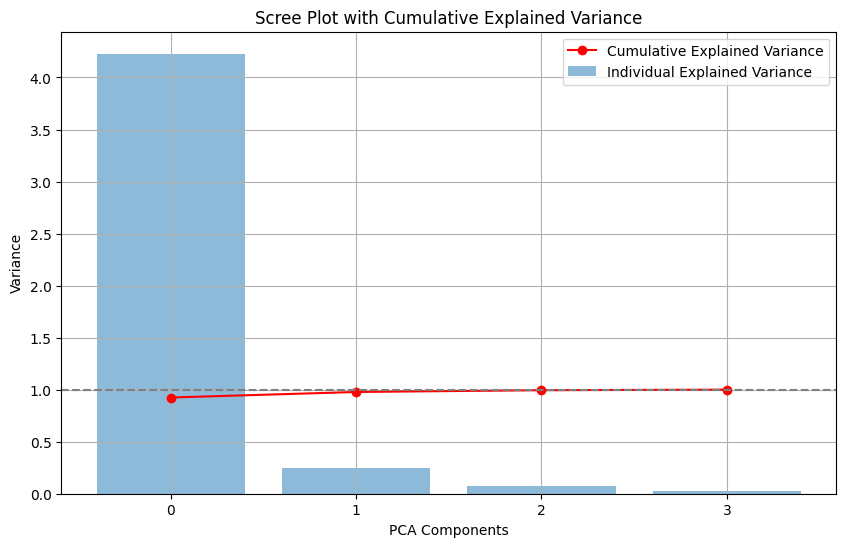

In [57]:
# Create the scree plot for explained variance
scree = range(pca.n_components_)
explained_variance = pca.explained_variance_
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))

# Bar plot for individual explained variance
plt.bar(scree, explained_variance, alpha=0.5, label='Individual Explained Variance')
plt.xlabel('PCA Components')
plt.ylabel('Variance')
plt.xticks(scree)

# Line plot for cumulative explained variance
plt.plot(scree, cumulative_variance, marker='o', color='red', label='Cumulative Explained Variance')

# Add legend and title
plt.title('Scree Plot with Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.axhline(y=1, color='grey', linestyle='--')  # Optional line at y=1
plt.show()

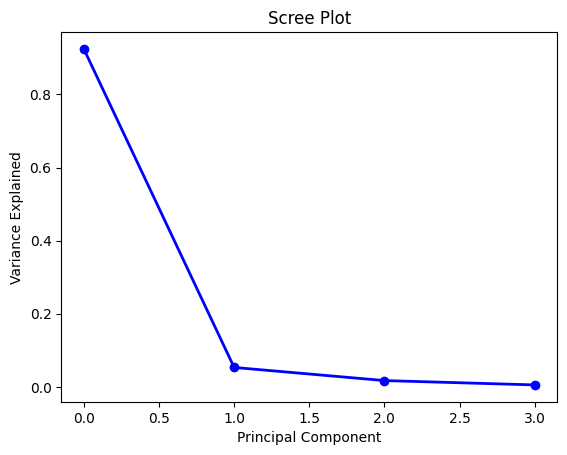

In [58]:
# A different scree plot
plt.plot(scree, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.savefig('scree_plot_2')
plt.show()

In [59]:
# 9. Produisez une table représentant pour chaque composantes les eigenvalues, et le % de variance expliquée, comme dans la Table 1 de l'énoncé. 
# Quel lien semble unir les eigenvalues et le % de variance expliquée ?

# 9. Produce a table showing the eigenvalues and % of variance explained for each component. 
# What link seems to exist between the eigenvalues and the % of variance explained?

In [60]:
# Produce a summary table of Eigenvalues (variance explained) and proportions of simple and cumulative variances
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(4)], 
        "Eigen-values (Variance expliquée)" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Eigen-values (Variance expliquée),% variance expliquée,% cum. var. expliquée
0,Dim1,4.228242,92.0,92.0
1,Dim2,0.242671,5.0,98.0
2,Dim3,0.078210,2.0,99.0
3,Dim4,0.023835,1.0,100.0


In [ ]:
# In PCA, each principal component has an associated eigenvalue. 
# Eigenvalues indicate the amount of variance captured by a principal component. Large eigenvalues correspond to principal components 
# components capturing more variance in the dataset.
# The percentage of variance explained by a principal component is calculated by dividing the eigenvalue of the principal component
# by the sum of all eigenvalues.

## Interpretation

    # High Eigenvalue: A high eigenvalue for a principal component indicates that this component captures a significant amount of the variance in the data,
    # meaning that it contains valuable information about the dataset.

    # Variance explained: The explained variance percentage provides a normalized way to understand the significance of each component relative to the entire dataset.
    # For example, if the first component has an eigenvalue that accounts for 70% of the total variance, it is likely the most informative component.

    # Scree Plot: In a scree plot, the eigenvalues (or explained variance) are plotted against the component index. The "elbow" of the plot can indicate the number
    # of components that should be retained for analysis, as adding more components after this point yields diminishing returns in terms of explained variance.

## Conclusion

    # In summary, the eigenvalues directly determine the percentage of variance explained by each principal component. Higher eigenvalues correspond to components 
    # that explain more variance, making them more significant in capturing the structure of the data. Understanding this relationship helps in deciding 
    # how many components to retain when performing PCA. If you have further questions or need more clarification, feel free to ask!

In [ ]:
# 10. Représentez maintenant à travers une table la saturation (factor loading) des différentes variables sur les composantes principales. 
# Quel est pour la CP1, la variable qui présente la saturation la plus forte ? Quel lien pouvez-vous effectuer avec le cercle
# des corrélations vu précédemment ?

# 10. Now use a table to represent the factor loading of the various variables on the principal components. 
# For CP1, which variable has the highest factor loading ? What link can you make with the circle
# of correlations seen earlier?

In [61]:
# Standardizing features (centring and reducing)
scaled_features = StandardScaler().fit_transform(features)

In [62]:
# Re-run PCA with only two components
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_features)

In [63]:
# Calculate loadings for the PCA
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], columns=['PC1', 'PC2'])

In [64]:
# Display loadings dataframe to identify the most important variable
print(loadings_df)

                   PC1       PC2
sepal.length  0.893151  0.362039
sepal.width  -0.461684  0.885673
petal.length  0.994877  0.023494
petal.width   0.968212  0.064214


In [65]:
# Identify the variable with the highest loading on PC1
max_loading_variable = loadings_df['PC1'].idxmax()
max_loading_value = loadings_df['PC1'].max()

print(f"\nVariable with the highest loading on PC1: {max_loading_variable} with loading value: {max_loading_value:.4f}")

# Identify the relationship with the correlation circle
print(f"The variable '{max_loading_variable}' is likely to be closely aligned with PC1 in the correlation circle.")


Variable with the highest loading on PC1: petal.length with loading value: 0.9949
The variable 'petal.length' is likely to be closely aligned with PC1 in the correlation circle.


In [ ]:
##Interpretation

# The variable with the highest loading on CP1 indicates the strongest influence on that component. In relation to the correlation circle, 
# this variable will have an arrow pointing close to the direction of PC1, indicating a strong positive correlation.

In [ ]:
# 11. Réalisez une table où pour chaque composante principale, en ligne, vous représentez la variable dont la saturation est la plus forte pour une CP donnée. 
# Il existe une commande dédiée en Python.

# 11. Create a table where, for each main component, you represent the variable with the highest saturation for a given CP. 
# There is a dedicated command in Python.

In [66]:
# Create a table with the variable that has the highest loading for each principal component
max_loadings_df = pd.DataFrame(index=[f'PC{i+1}' for i in range(loadings.shape[1])], columns=['Variable', 'Loading'])

for pc in max_loadings_df.index:
    max_loadings_df.loc[pc, 'Variable'] = loadings_df[pc].idxmax()  # Get the variable with max loading for each PC
    max_loadings_df.loc[pc, 'Loading'] = loadings_df[pc].max()      # Get the corresponding max loading value

# Display the saturation table
print("Saturation Table:")
print(max_loadings_df)

Saturation Table:
         Variable   Loading
PC1  petal.length  0.994877
PC2   sepal.width  0.885673


In [ ]:
# 12. Reprenez maintenant le cercle des corrélations fait précédemment. Quel lien effectuez-vous entre saturation des variables et 
# l’orientation des flèches représentant des vecteurs pour chaque variable ?

# 12. Now go back to the circle of correlations you made earlier. What link do you make between saturation of the variables and 
# the orientation of the arrows representing vectors for each variable?

In [ ]:
## Orientation of arrows

    # If two arrows are pointing in the same direction or almost (angles close to 0°), this means that the two variables are positively correlated. 
    # The closer the arrows are to each other, the stronger the correlation between these variables.

    # If two arrows point in opposite directions (angles close to 180°), this means that the two variables are negatively correlated.

    # If two arrows form an angle close to 90°, this means that there is no linear correlation between these variables.


## Length of arrows (saturation)

    # A long arrow represents a highly saturated variable on the principal components. This means that this variable contributes 
    # to the variance explained by these axes. In other words, the variable is well represented in the principal components plane.

    # A short arrow means that the variable is weakly saturated, so it contributes little to the variance explained by these axes, 
    # and is not well represented in the correlation circle.


## Link between saturation and orientation

    # The saturation of variables and the orientation of the arrows are directly linked: 
    # Highly saturated variables, represented by long arrows, have orientations that illustrate strong correlations (positive or negative) 
    # with the main axes. 
    # Weakly saturated variables, represented by short arrows, are less correlated with the main axes and are therefore not very informative in this projection. 
    # therefore not very informative in this projection.


## Example in the context of the Iris dataset:

    # Variables such as petal length and petal width may have close arrows, as they are likely to be 
    # strongly correlated (variables linked to petal size).

    # Variables such as sepal length and sepal width could also show a positive correlation, but perhaps in a slightly different direction to petals.
    # slightly different from petal size.

    # In conclusion, the more a variable is saturated on the principal components, the longer its arrow will be, and the more the orientation of this arrow
    # in relation to other arrows will indicate a correlation (positive, negative or independent).

In [ ]:
# 13. Expliquez ce que signifie, au juste, la qualité de la représentation d’une variable par une ACP. Représentez maintenant le cercle des corrélations,
# mais la couleur de la fléche doit dépendre de la qualité de la représentation des variables par l’ACP. Vous utiliserez les cos2, puis les contributions.
# Quelle est la principale différence entre ces deux métriques ?

# 13. Explain what exactly is meant by the quality of the PCA representation of a variable. Now show the correlation circle,
# but the colour of the arrow should depend on the quality of the PCA representation of the variables. You will use cos2 and then contributions.
# What is the main difference between these two metrics?

In [ ]:
## Quality of the representation of a variable by a PCA

    # The quality of the representation of a variable by a PCA is measured by the cos2 of the angle between a variable and its projection on an axis or plane. 
    # cos2 is calculated axis by axis. This metric indicates how much of the variance of a variable is explained by the principal axes. 
    # This means that the closer a variable is to the main axes, the better it is represented in the factorial design.

    # The cos² of a variable on an axis is the square of the cosine of the angle between the vector of the variable and the axis in question. 
    # This quantifies the extent to which the variable is ‘projected’ onto the axis.
    # If the cos² of a variable is close to 1 on an axis, this means that the axis explains most of the variance of this variable.
    # If the cos² is low, the variable is poorly represented by that axis, and other axes will probably need to be examined to understand its contribution.

## cos² and contributions :

    # The cos² measures how much of a variable is explained by each axis. It is an indicator of the quality of the representation.
    # The contribution measures how much a variable contributes to the definition of a particular axis. It indicates the extent to which the variable helps to form the axis.

## Main difference :

    # cos² focuses on the quality of the projection of a variable on a given axis. 
    # It answers the question: ‘How well does this axis represent this variable?

    # The contribution focuses on the importance of a variable in the construction of the axis. 
    # It answers the question: ‘What is the contribution of this variable to the creation of this axis?’


## Why be interested in the quality of the representation? 
 
    # Because the proximity between well-projected individuals or the links between well-projected variables can be interpreted. 
    # On the other hand, if two individuals are poorly projected, this means that they are far from the projection plane. Even if they are close on the plane,
    # they may be distant in space in relation to a 3rd or 4th dimension. It will therefore not be possible to interpret their proximity.

    # The contributions will show whether the axis was constructed mainly because of one or more very specific variables


In [67]:
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [68]:
# Calculating cos² (quality of representation) for PC1 and PC2
explained_variance = pca.explained_variance_ratio_
cos2 = (pca.components_**2) / np.sum(pca.components_**2, axis=0)
total_cos2= np.sum(cos2[:2, :], axis=0)  # Sum for PC1 and PC2

In [69]:
# Create a cos2 table for better readability
cos2_df = pd.DataFrame(cos2.T, index=iris_df.columns[:-1], columns=[f"PC{i+1}" for i in range(pca.n_components_)])

cos2_df

,PC1,PC2
sepal.length,0.655894,0.344106
sepal.width,0.078428,0.921572
petal.length,0.998223,0.001777
petal.width,0.986150,0.013850


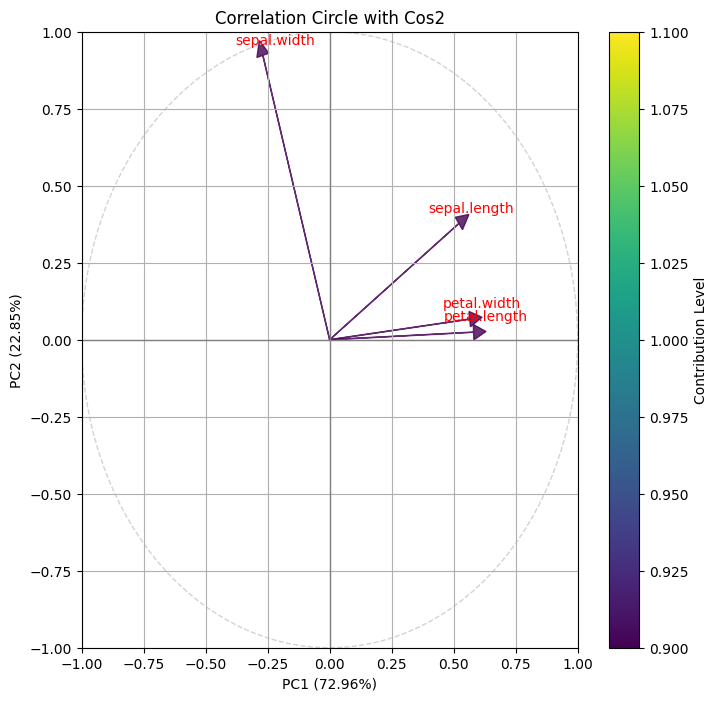

In [70]:
# Assuming cos2_df and pca.components_ are already defined and that iris_df has the feature names
# Normalize the contributions to use in color mapping
cmap = cm.viridis  # Choose a colormap
total_cos2= np.sum(cos2[:2, :], axis=0)  # Sum for PC1 and PC2
norm = Normalize(vmin=np.min(total_cos2), vmax=np.max(total_cos2))
colors = cmap(norm(total_cos2))

# Plot the correlation circle with contributions
plt.figure(figsize=(8, 8))
for i, feature in enumerate(iris_df.columns[:-1]):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
              color=colors[i], alpha=0.8, head_width=0.05, head_length=0.05)
    plt.text(pca.components_[0, i] + 0.05, pca.components_[1, i] + 0.05, feature, 
             color='red', ha='center', va='center')

# Draw the correlation circle
circle = plt.Circle((0, 0), 1, color='lightgrey', fill=False, linestyle='--', linewidth=1)
plt.gca().add_artist(circle)

# Properly link the ScalarMappable object to the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # We set an empty array to avoid issues with the color bar
cbar = plt.colorbar(sm, ax=plt.gca())  # Explicitly set the axes for the color bar
cbar.set_label('Contribution Level')

# Set limits, labels, and titles
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.grid()
plt.title('Correlation Circle with Cos2')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()  

In [71]:
# Calculating contributions for PC1 and PC2
explained_variance = pca.explained_variance_ratio_
contributions = np.square(pca.components_) / np.sum(np.square(pca.components_), axis=1, keepdims=True)
total_contributions = np.sum(contributions[:2, :], axis=0)  # Sum for PC1 and PC2

In [72]:
# Create a contribution table for better readability
contributions_df = pd.DataFrame(contributions.T, index=iris_df.columns[:-1], columns=[f"PC{i+1}" for i in range(pca.n_components_)])

contributions_df

,PC1,PC2
sepal.length,0.271510,0.142444
sepal.width,0.072548,0.852475
petal.length,0.336879,0.000600
petal.width,0.319063,0.004481


In [ ]:
# This table, labeled as the "contribution table," represents the loading factors or contributions of the original 
# features (sepal.length, sepal.width, petal.length, petal.width) to each principal component (PC1, PC2, etc.) in a Principal 
# Component Analysis (PCA).


# What Each Element Represents : 

    # Each value in the table indicates how much a specific original feature contributes to a particular principal component.
    # For example:
        # The contribution of sepal.length to PC1 is 0.271510.
        # The contribution of petal.length to PC2 is 0.000600.
        # The larger the value, the more that feature contributes to the variance explained by the respective principal component.


# Row and Column Interpretation

    #Rows:

        # The rows represent the original features of the dataset (e.g., sepal.length, sepal.width, etc.).
        # These features are the variables that were used as input for the PCA.

    # Columns:

        # The columns represent the principal components (e.g., PC1, PC2).
        # Each PC is a linear combination of the original features, designed to explain the maximum variance in the dataset.


# Insights from the Table

    # 1. PC1:
        # The feature petal.length has the highest contribution to PC1 (0.336879), followed closely by petal.width (0.319063).
        # This suggests that PC1 is primarily influenced by the petal.length and petal.width.
    
    # 2. PC2:
        # The feature sepal.width dominates in PC2 with a contribution of 0.852475.
        # This means PC2 primarily captures the variance explained by the sepal.width feature.
    
    # 3. Small Contributions:
        # Features like petal.length and petal.width contribute very little to PC2, as indicated by their low values (0.000600 and 0.004481).


# Practical Use of This Table

    # Feature Importance:

        # This table helps identify which features are most important for each principal component. For example:
        # If PC1 is used to interpret the data, you focus on petal.length and petal.width.
        # For PC2, sepal.width is critical.

    # Dimensionality Reduction:

        # You can decide to exclude certain principal components or focus on a subset based on which features they represent.
        # For instance, if only PC1 and PC2 explain a significant amount of variance, you analyze these two PCs instead of all the original features.

In [73]:
pca.components_[0: 2]

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

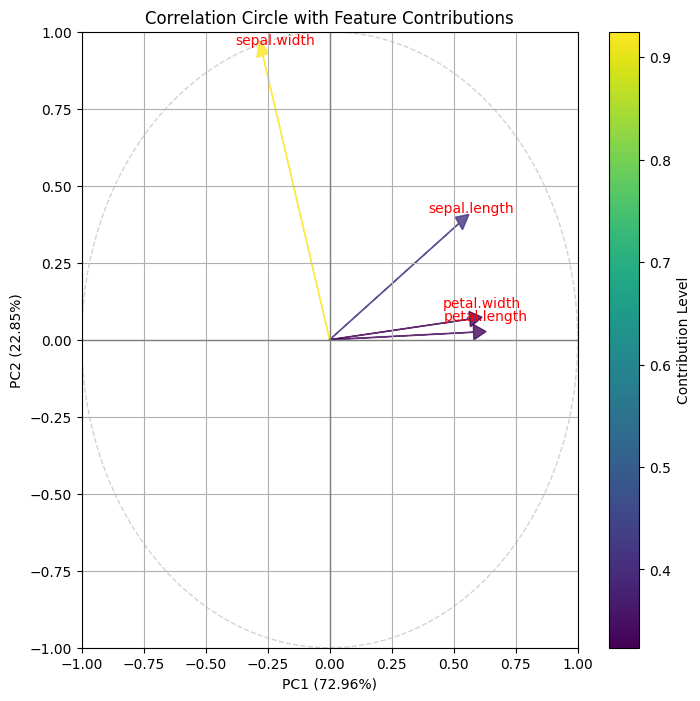

In [74]:
# Assuming contributions_df and pca.components_ are already defined and that iris_df has the feature names
# Normalize the contributions to use in color mapping
cmap = cm.viridis  # Choose a colormap
total_contributions = np.sum(contributions[:2, :], axis=0)  # Sum for PC1 and PC2
norm = Normalize(vmin=np.min(total_contributions), vmax=np.max(total_contributions))
colors = cmap(norm(total_contributions))

# Plot the correlation circle with contributions
plt.figure(figsize=(8, 8))
for i, feature in enumerate(iris_df.columns[:-1]):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
              color=colors[i], alpha=0.8, head_width=0.05, head_length=0.05)
    plt.text(pca.components_[0, i] + 0.05, pca.components_[1, i] + 0.05, feature, 
             color='red', ha='center', va='center')

# Draw the correlation circle
circle = plt.Circle((0, 0), 1, color='lightgrey', fill=False, linestyle='--', linewidth=1)
plt.gca().add_artist(circle)

# Properly link the ScalarMappable object to the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # We set an empty array to avoid issues with the color bar
cbar = plt.colorbar(sm, ax=plt.gca())  # Explicitly set the axes for the color bar
cbar.set_label('Contribution Level')

# Set limits, labels, and titles
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.grid()
plt.title('Correlation Circle with Feature Contributions')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()

In [75]:
# 14. Répétez l’étape précédentes, mais en représentant cette fois uniquement les individus sur le plan factoriel. De la même manière, 
# la couleur des individus devra dépendre de la qualité de leur représentation par l’ACP.

# 14. Repeat the previous step, but this time representing only the individuals on the factorial plane. In the same way, 
# the colour of the individuals will depend on the quality of their PCA representation.

In [76]:
# Apply PCA
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(scaled_features)  # Project individuals onto the PCA space

In [77]:
# Calculate cos² (quality of representation) for each individual
cos2_individuals = np.sum(np.square(pca_scores), axis=1) / np.sum(np.square(pca_scores), axis=1)

In [78]:
# Assuming pca_scores and cos2_individuals are already defined
# Normalize cos² values for color mapping
cmap = cm.viridis  # Choose a colormap
norm = Normalize(vmin=np.min(cos2_individuals), vmax=np.max(cos2_individuals))
colors = cmap(norm(cos2_individuals))

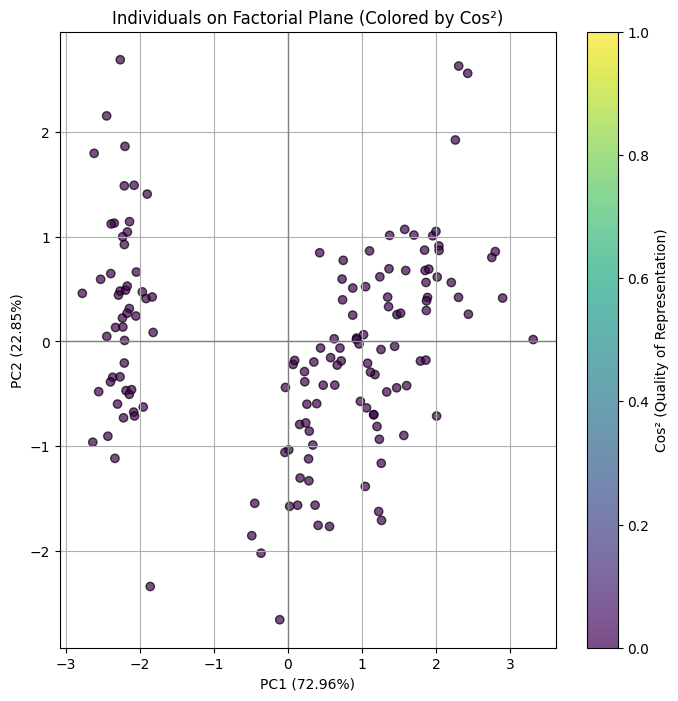

In [79]:
# Plot the individuals on the factorial plane with colors based on cos²
plt.figure(figsize=(8, 8))
scatter = plt.scatter(pca_scores[:, 0], pca_scores[:, 1], c=colors, alpha=0.7, edgecolor='k')

# Plot axis lines and labels
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.title('Individuals on Factorial Plane (Colored by Cos²)')
plt.grid(True)

# Add a color bar to indicate the cos² values
cbar = plt.colorbar(scatter)
cbar.set_label('Cos² (Quality of Representation)')

plt.show()

In [ ]:
##Cos² Values:

    # Cos² (cosine squared) values are used to measure how well each individual (data point) is represented by the principal components.
    # For each individual, the cos² values for PC1 and PC2 tell us how much of the individual’s total variance is explained by each of these components.
    # A high cos² value indicates that the individual is well-represented by the principal components, while a low cos² value means that 
    # the individual is not well-represented by these components.

## Color Coding:

    # In the plot, each individual (data point) is assigned a color based on its cos² value. Points with higher cos² values (better representation) 
    # will have one color (e.g., yellow), while those with lower cos² values (worse representation) will have a different color (e.g., purple).
    #The color map typically ranges from dark colors (low cos² values) to bright colors (high cos² values), giving a visual representation of how well each individual is represented by the PCA.

## Color Interpretation:

    # Bright colors (e.g., yellow or light green): These points have high cos² values, meaning they are well represented by the principal components.

    # Dark colors (e.g., purple or dark blue): These points have low cos² values, meaning they are not well-represented by the principal components. 
    # More components might be needed to fully explain their variance.

## Example of Interpretation:

    #Let's say you have individuals (rows of data) projected onto the PCA plane. The color for each individual depends on how well PC1 
    # and PC2 explain their variance.

    # If a point is colored bright yellow, it means that this individual is highly explained by the first two principal components.
    # If a point is colored dark purple, it means that this individual is not well explained by the first two principal components 
    # and would need more components to capture its variance.

## Data Behind the Colors:

    # The cos² values, which we use to color the points, can be seen in a table format, like this:

    # Individual	Cos² PC1	Cos² PC2	Color
    # Ind_1     	0.85	    0.10	    Yellow
    # Ind_2	        0.40	    0.45	    Green
    # Ind_3	        0.15	    0.05	    Purple

    #  Ind_1: Well represented by PC1 (cos² PC1 = 0.85), and the corresponding color would be bright.
    # Ind_3: Poorly represented by both PC1 and PC2, and the corresponding color would be dark.

## Summary:

    # Cos² values tell us how well each individual is represented by the principal components.
    # Colors help visualize this quality, with brighter colors indicating better representation.
    # This approach allows us to quickly see which individuals are captured well by the PCA and which might need additional components for a fuller explanation.

In [ ]:
# 15. Produisez une table représentant la contribution des individus aux deux premiers axes de l’ACP. Que représente au juste cette contribution ?

# 15. Produce a table representing the contribution of individuals to the first two axes of the PCA. What exactly does this contribution represent?

In [80]:
# Assuming pca and pca_scores have been calculated (pca_scores contains the projected individuals)
# pca_scores contains the individuals projected onto the PCA plane
# pca.components_ is used for the PCA component loadings

# Calculate squared scores for each individual
squared_scores = np.square(pca_scores)

# Sum of squared scores for each individual
total_squared_scores = np.sum(squared_scores, axis=1, keepdims=True)

# Calculate individual contributions (squared scores normalized by the sum of squared scores for each individual)
contributions_individuals = squared_scores / total_squared_scores

# Create a DataFrame for the contributions to PC1 and PC2
contributions_individuals_df = pd.DataFrame(contributions_individuals, columns=["Contribution PC1", "Contribution PC2"])

contributions_individuals_df

,Contribution PC1,Contribution PC2
0,0.957005,0.042995
1,0.905022,0.094978
2,0.979514,0.020486
3,0.936769,0.063231
4,0.931743,0.068257
...,...,...
145,0.958958,0.041042
146,0.752750,0.247250
147,0.969662,0.030338
148,0.648238,0.351762


In [ ]:
## Steps Explanation 

    # a. Squared Scores: We calculate the squares of the projections (scores) of the individuals on each principal component (PC1 and PC2).
    # b. Contribution: We divide these squares by the sum of the squares for each individual, which gives the contribution of each individual to the first two axes.
    # c. Contribution table : The table displays the contributions of individuals to the first two axes (PC1 and PC2).

## What does this contribution represent?

    # If an individual has a high contribution on PC1, this means that it is an important observation for defining the PC1 axis.
    # Individuals with low contributions have little influence on the variance explained by these axes.

# This table gives an overview of the importance of each individual for the construction of the main axes.

In [ ]:
# 18. Rappelez le fonctionnement de l’algorithme k-means, en insistant sur la différence entre l’étape dite d’expectation, et celle de maximisation. 
# Décrivez la trajectoire que suivent, avec cet algorithme, les différents centroïdes au fil des itérations.

# 18. Recall how the k-means algorithm works, emphasising the difference between the expectation stage and the maximisation stage. 
# Describe the trajectory followed by the various centroids over the iterations of this algorithm.

In [ ]:
## K-Means algorithm

    # K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. 
    # The goal is to identify the K number of groups in the dataset. 

    # L'objectif du clustering est de diviser la population ou l'ensemble de points de données en un certain nombre de groupes afin 
    # que les points de données de chaque groupe soient plus comparables les uns aux autres et différents des points de données des autres groupes. 
    # Il s'agit essentiellement d'un regroupement d'éléments en fonction de leurs similitudes et de leurs différences. 


## How does K-Means clustering work?

    # The task of the K-Means algorithm (unsupervised learning algorithm) is to classify the elements of a dataset into groups (clusters). 
    # K’ in the name of the algorithm represents the number of groups/clusters into which we want to classify our elements.

    # We begin by manually specifying the value of k, the number of clusters that will be generated by the algorithm. K is generally chosen 
    # randomly at the beginning (unless we have in-depth knowledge of the context), and we will then try to find the optimal value 
    # based on the first results obtained, or by using optimisation methods.


    # For example, we choose k = 3. These 3 ‘prototype’ data points (A,B,C) are called centroids and represent the centres of the groups. 
    # At the beginning, they will be chosen and placed randomly. The algorithm goes through the data points one by one, measuring the distance 
    # between each point and the three centroids (A, B and C). The algorithm then groups the data point with the nearest centroid.

    # When the size of the dataset is large, we don't necessarily have any assumptions about the data, and we can't choose the value of 
    # k intuitively. There are two empirical methods that can be used to determine a value for optimal when we don't know exactly 
    # how many clusters would exist in the dataset: the elbow method and the silhouette method


## Expectation Maximization Estimation (EM)

    # Where traditional algorithms  like K-Means are a bit like  trying to sort  the toys while wearing a blindfold, they can do descent job if the groups 
    # are very different, but struggle if things are a bit mixed up. The EM algorithm is a bit more clever and can deal with these more difficult tasks.

    # The Expectation Maximization (EM) algorithm relies on maximizing the likelihood to find the statistical parameters of the underlying sub-populations 
    # in the dataset. The EM algorithm alternates between two steps (E-step and M-step). 
    # In the E-step the algorithm tries to find a lower bound function on the original likelihood using the current estimate of the statistical parameters. 
    # In the M-step the algorithm finds new estimates of those statistical parameters by maximizing the lower bound 
    # function (i.e. determine the MLE of the statistical parameters). Since at each step we maximize the lower bound function, the algorithm always 
    # produces estimates with higher likelihood than the previous iteration and ultimately converge to a maxima.


## Explaining differences between Expectation and Maximization

    # In the Expectation-Maximization algorithm, think of 'Expectation and 'Maximization' as two friends who are very  good at solving puzzles. 
    # They work together to sort data, just like sorting different colored marbles into jars

    # In the Expectation step, the EM algorithm make a guess about where each piece of data belongs. It calculates 'membership probabilities' 
    # for each piece of data. Membership probabilities are like  scores that tell how likely each piece of data belongs to each cluster.

    # After making guesses in the Expectation step, the EM algorithm moves to Maximization step. This is where it updates the parameters 
    # based on how good its guesses were.

    # The EM algorithm stops when the guesses  aren't improving much anymore - when it has found the best possible clusters it can with the data it has.


## what makes EM so special over K-means? 
 
    # Unlike K-means, in EM, the clusters are not limited to spherical shapes. 
    # In EM we can constrain the algorithm to provide different covariance matrices (spherical, diagonal and generic). 
    # These different covariance matrices in return allow us to control the shape of our clusters and hence we can detect sub-populations 
    # in our data with different characteristics.


## Behaviour of centroids 

    # The behaviour of centroids over iterations, in the context of clustering algorithms such as k-means, is crucial for understanding how 
    # the algorithm converges to a stable solution. Here's how it usually works:

    # 1. initialise the centroids:
    # At the start of the algorithm, centroids are initialized, often randomly or using methods such as k-means++ to 
    # improve convergence. At this stage, the centroids may be far from the actual clusters.

    # 2. Assigning Points: 
    # Each data point is assigned to the nearest centroid according to a chosen distance (usually the Euclidean distance).
    # This assignment creates initial ‘clusters’.

    # 3. Centroids are updated:
    # Centroids are then updated by averaging (or centring) the points in each cluster.
    # After the first update, the centroids usually change significantly, moving closer to the true centres of the clusters.

    # 4. Convergence:
    # The algorithm repeats the centroid assignment and update steps until the position of the centroids hardly changes at all 
    # or the change is less than a defined threshold. This is when the algorithm converges.
    # With each iteration, the centroids move less and less. This phenomenon is particularly noticeable in the first iterations, 
    # where change is rapid, before slowing down.

    # One interesting idea is to run the algorithm with different values of k and measure for each the sum of the distances between the points and their centroids. 
    # their centroid. By using the elbow technique, you can highlight an optimal value of k. 
    



In [ ]:
# 19. Appliquez l’algorithme de kmeans pour réaliser un clustering des différentes fleurs recensées dans le jeu de données, 
# puis affichez dans le même plan que celui de l’ACP les différents individus, avec une couleur par cluster. Vous devrez donc 
# prendre en entrée un nombre défini de composantes principales, et non les variables originelles du jeu de données. Vous commencerez avec k=3. 
# Décrivez les caractéristiques de ces trois clusters, en termes de moyennes de variables quantitatives, et de proportions des différentes espèces 
# représentées

# 19. Apply the kmeans algorithm to cluster the different flowers identified in the dataset, 
# then display the different individuals in the same plane as the PCA, with one colour per cluster. You will therefore need to 
# take as input a defined number of principal components, and not the original variables in the dataset. You will start with k=3. 
# Describe the characteristics of these three clusters, in terms of the averages of the quantitative variables, and the proportions of the different species 
# represented

In [81]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [82]:
print(iris_df["variety"].head())

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: category
Categories (3, object): ['Setosa', 'Versicolor', 'Virginica']


In [83]:
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [84]:
# Create a new dataframe by deleting the ‘variety’ column containing the categories
iris_df2 = iris_df.drop("variety", axis=1)

In [85]:
# Standardizing the dataframe (centring and reducing)
scaler= StandardScaler()
iris_df2_scaled= scaler.fit_transform(iris_df2)

# Applying PCA to reduce dimensionality to four main components
pca19= PCA(n_components= 4)
pca19_ok= pca19.fit_transform(iris_df2_scaled)

In [86]:
# Apply the K-Means algorithm with 3 clusters and k-means++.
model = KMeans(n_clusters=3, init='k-means++', n_init=20,random_state=42)
labels = model.fit_predict(pca19_ok)  # Adapt the KMeans model to the data and obtain the clusters

In [87]:
# Create a DataFrame combining the labels obtained with the original species
new_iris_df = pd.DataFrame({'PC1': pca19_ok[:, 0], 'PC2': pca19_ok[:, 1], 'Cluster': labels, 'Species': iris_df['variety']})

new_iris_df.head()

,PC1,PC2,Cluster,Species
0,-2.264703,0.480027,1,Setosa
1,-2.080961,-0.674134,1,Setosa
2,-2.364229,-0.341908,1,Setosa
3,-2.299384,-0.597395,1,Setosa
4,-2.389842,0.646835,1,Setosa


In [88]:
# Create a mapping between clusters and the most frequent species in each cluster
cluster_to_species = new_iris_df.groupby('Cluster')['Species'].agg(lambda x: x.mode()[0]).to_dict()
cluster_to_species

{0: 'Versicolor', 1: 'Setosa', 2: 'Virginica'}

In [89]:
# Add a new column using species names instead of cluster labels
new_iris_df['Cluster_Name'] = new_iris_df['Cluster'].map(cluster_to_species)

new_iris_df.head()

,PC1,PC2,Cluster,Species,Cluster_Name
0,-2.264703,0.480027,1,Setosa,Setosa
1,-2.080961,-0.674134,1,Setosa,Setosa
2,-2.364229,-0.341908,1,Setosa,Setosa
3,-2.299384,-0.597395,1,Setosa,Setosa
4,-2.389842,0.646835,1,Setosa,Setosa


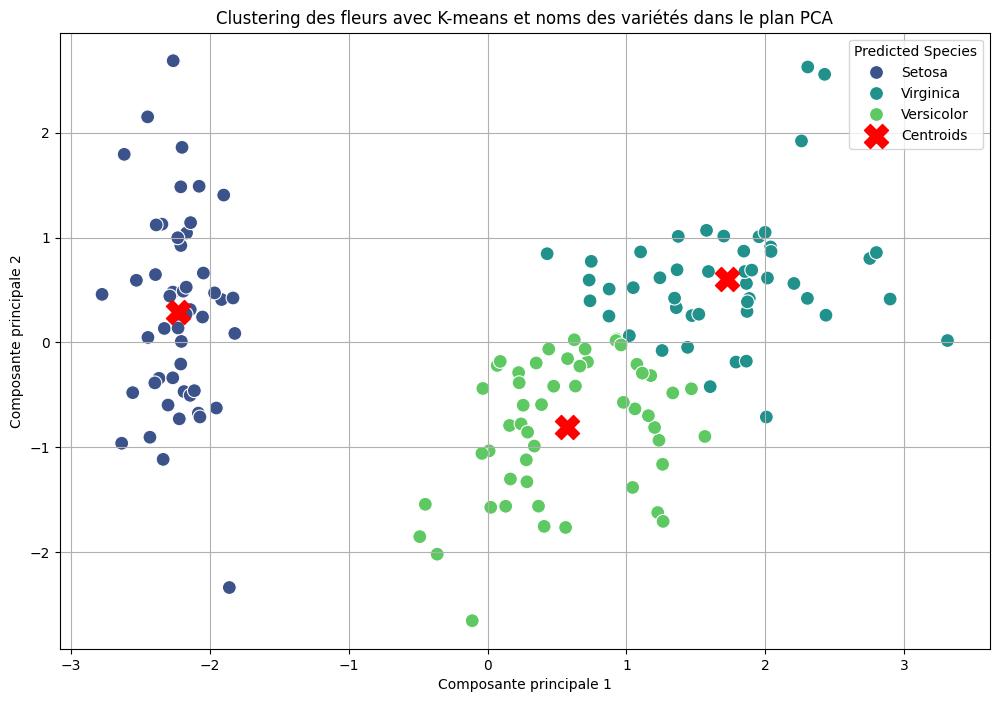

In [90]:
# Plot clusters and centroids in the 2D plane using the two principal components of PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(data=new_iris_df, x='PC1', y='PC2', hue='Cluster_Name', palette='viridis', s=100, legend='full')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Clustering des fleurs avec K-means et noms des variétés dans le plan PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')   
plt.legend(title='Predicted Species')
plt.grid(True)
plt.show()

In [91]:
# Analyse species distribution by cluster
species_distribution = new_iris_df.groupby('Cluster')['Species'].value_counts(normalize=True).unstack().round(2)
print("\nSpecies distribution within each cluster:")
print(species_distribution)


Species distribution within each cluster:
Species  Setosa  Versicolor  Virginica
Cluster                               
0           0.0        0.74       0.26
1           1.0        0.00       0.00
2           0.0        0.23       0.77


In [ ]:
# Virginica species: 26% contained in cluster 0. The remaining 77% contained in cluster 2.
# Versicolor species: 74 % contained in cluster 0. The remaining 23 % are in cluster 2.
# Setosa species: 100 % in cluster 1

# Concerning the Setosa species, we can conclude that the KMeans algorithm has correctly separated this species.
# For the Virginica and Versicolor species, the algorithm did not separate the species correctly.

In [92]:
import skimpy

In [93]:
# Merge the new_iris_df dataset with the iris_df dataset to add the sepal and petal variables
new_iris_df_2 = pd.merge(new_iris_df, iris_df, left_index=True, right_index=True)
new_iris_df_2.head()

,PC1,PC2,Cluster,Species,Cluster_Name,sepal.length,sepal.width,petal.length,petal.width,variety
0,-2.264703,0.480027,1,Setosa,Setosa,5.1,3.5,1.4,0.2,Setosa
1,-2.080961,-0.674134,1,Setosa,Setosa,4.9,3.0,1.4,0.2,Setosa
2,-2.364229,-0.341908,1,Setosa,Setosa,4.7,3.2,1.3,0.2,Setosa
3,-2.299384,-0.597395,1,Setosa,Setosa,4.6,3.1,1.5,0.2,Setosa
4,-2.389842,0.646835,1,Setosa,Setosa,5.0,3.6,1.4,0.2,Setosa


In [94]:
# Calculate the average of variables per cluster
variable_means= new_iris_df_2.groupby(["Cluster", "Cluster_Name"])[["sepal.length", "petal.length", "sepal.width"]].mean().round(2)

variable_means

,,sepal.length,petal.length,sepal.width
Cluster,Cluster_Name,,,
0,Versicolor,5.80,4.37,2.67
1,Setosa,5.01,1.46,3.43
2,Virginica,6.78,5.51,3.10


In [ ]:
# Cluster Virginica : Sepal Length at the best average with 6.78 cm, then Petal Length with 5.51 cm and Sepal Width with 3.10 cm.
# Cluster Versicolor : Sepal Length at the best average with 5.80 cm, then Petal Length with 4.37 cm and Sepal Width with 2.67 cm.
# Cluster Setosa : Sepal Length at the best average with 5.01 cm, then we find Sepal Width with 3.43 cm and Petal Length with 1.46 cm.

In [ ]:
# 20. Explorez grâce à un scree plot l’évolution de la variance intracluster, et appliquez différentes techniques pour déterminer le nombre optimal de clusters 
# a retenir. Expliquez la logique sous-jacente aux différentes techniques mobilisées.

# 20. Use a scree plot to explore the evolution of the intracluster variance, and apply different techniques to determine the optimal number of clusters 
# to retain. Explain the logic behind the different techniques used.

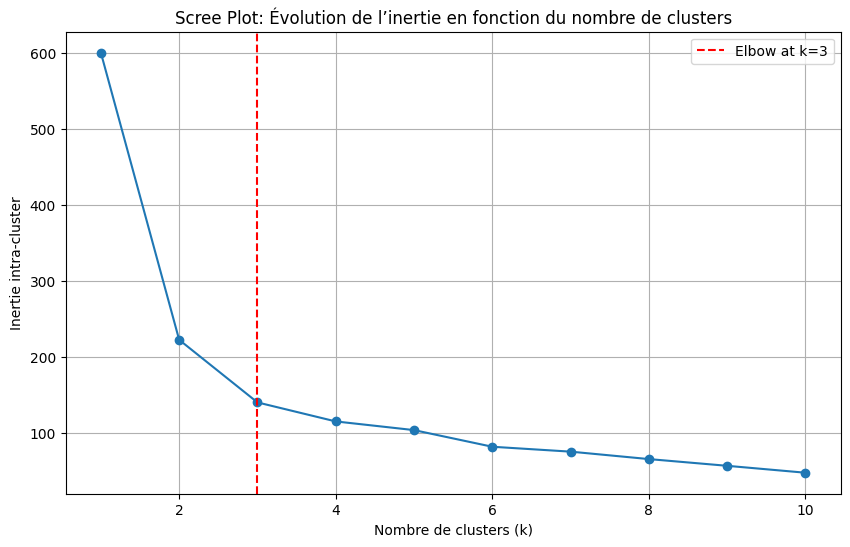

In [95]:
# Calculate inertia for different values of k
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris_df2_scaled)
    inertias.append(kmeans.inertia_)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o')
plt.title('Scree Plot: Évolution de l’inertie en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie intra-cluster')
plt.grid(True)
plt.axvline(x=3, color='red', linestyle='--', label='Elbow at k=3')
plt.legend()
plt.show()

In [96]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [97]:
# Range of cluster numbers to evaluate
cluster_range = range(2, 11)  # Silhouette score is not defined for k=1
silhouette_scores = []  # List to store silhouette scores for each number of clusters

# Calculate the silhouette score for each k
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(iris_df2_scaled)
    score = silhouette_score(iris_df2_scaled, cluster_labels)
    silhouette_scores.append(score)

    # Debugging statements to track the loop progress
    print(f"Number of clusters: {k}, Silhouette Score: {score}")

# Debugging step to verify list lengths
print(f"Length of cluster_range: {len(cluster_range)}")  # Should be 9
print(f"Length of silhouette_scores: {len(silhouette_scores)}")  # Should also be 9  

Number of clusters: 2, Silhouette Score: 0.5817500491982808
Number of clusters: 3, Silhouette Score: 0.4798814508199818
Number of clusters: 4, Silhouette Score: 0.3850454053045392
Number of clusters: 5, Silhouette Score: 0.34503345350274617
Number of clusters: 6, Silhouette Score: 0.33394323040061763
Number of clusters: 7, Silhouette Score: 0.2664290993719981
Number of clusters: 8, Silhouette Score: 0.34162906041313373
Number of clusters: 9, Silhouette Score: 0.3243991438983545
Number of clusters: 10, Silhouette Score: 0.33540615043919825
Length of cluster_range: 9
Length of silhouette_scores: 9


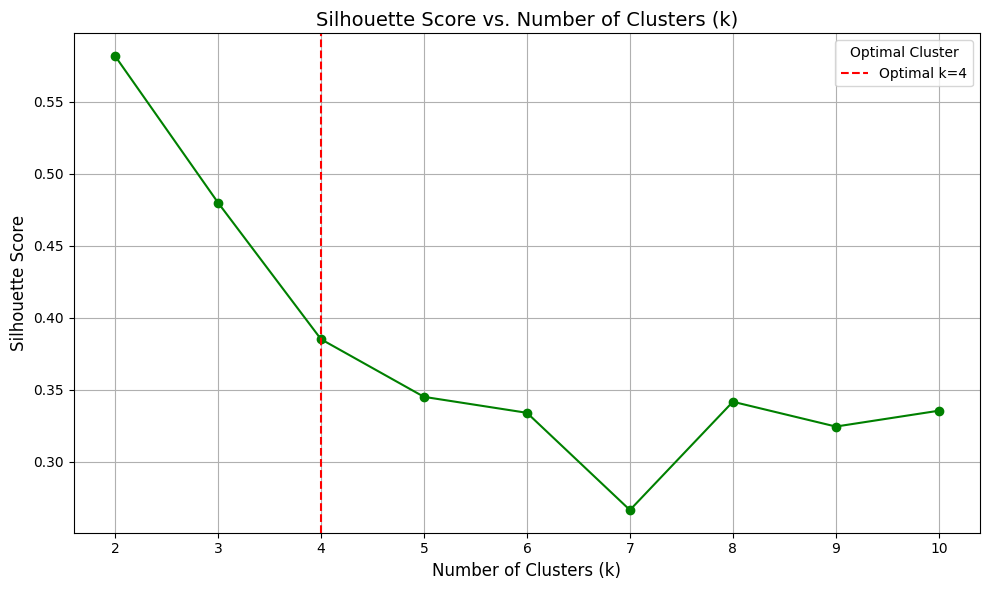

In [98]:
# Plotting the silhouette scores for each k if the dimensions match
if len(cluster_range) == len(silhouette_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, silhouette_scores, marker='o', color='green', linestyle='-')
    plt.title('Silhouette Score vs. Number of Clusters (k)', fontsize=14)
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Silhouette Score', fontsize=12)
    plt.axvline(x=4, color='red', linestyle='--', label='Optimal k=4', linewidth=1.5)
    plt.grid(True)
    plt.legend(title='Optimal Cluster', loc='best')
    plt.tight_layout()
    plt.show()
else:
    print("Error: The lengths of cluster_range and silhouette_scores do not match!")

In [99]:
cluster_range = range(2, 11)

For n_clusters = 2 The average silhouette_score is : 0.5817500491982808
For n_clusters = 3 The average silhouette_score is : 0.4565352255831264
For n_clusters = 4 The average silhouette_score is : 0.3850454053045392
For n_clusters = 5 The average silhouette_score is : 0.34380827431664635
For n_clusters = 6 The average silhouette_score is : 0.2982123214238712


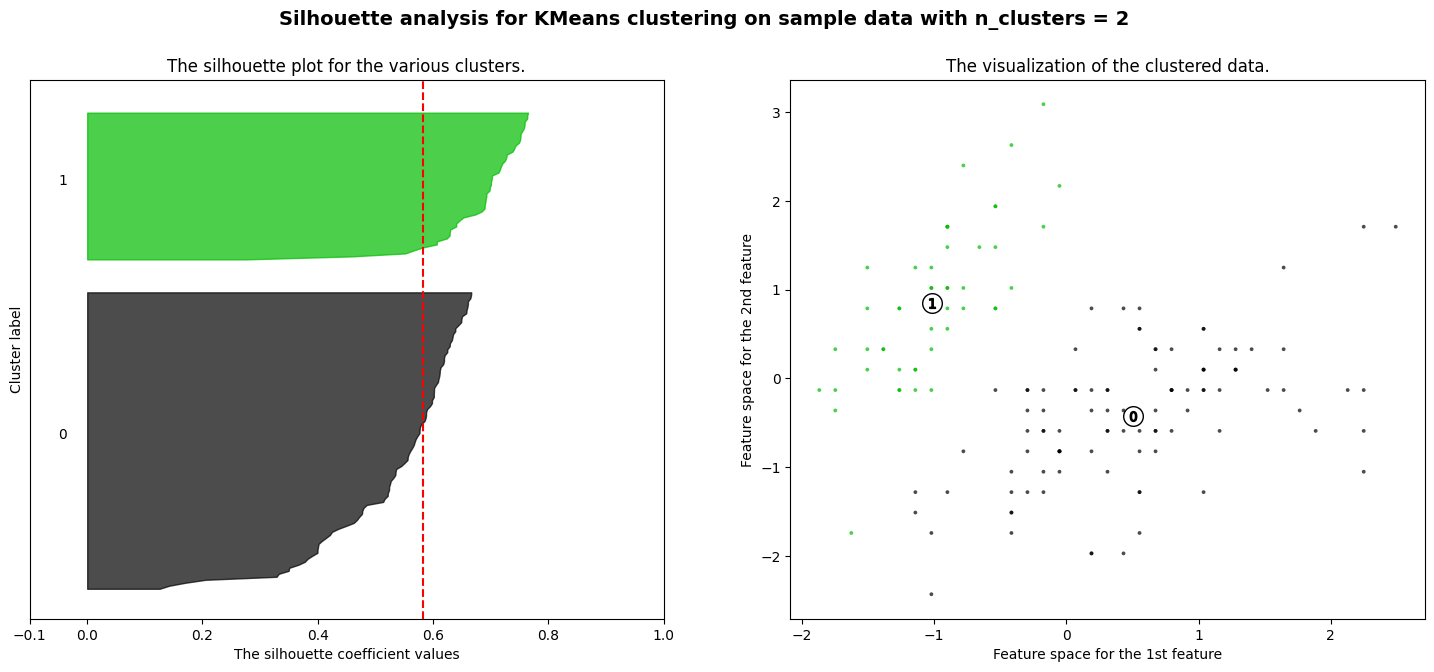

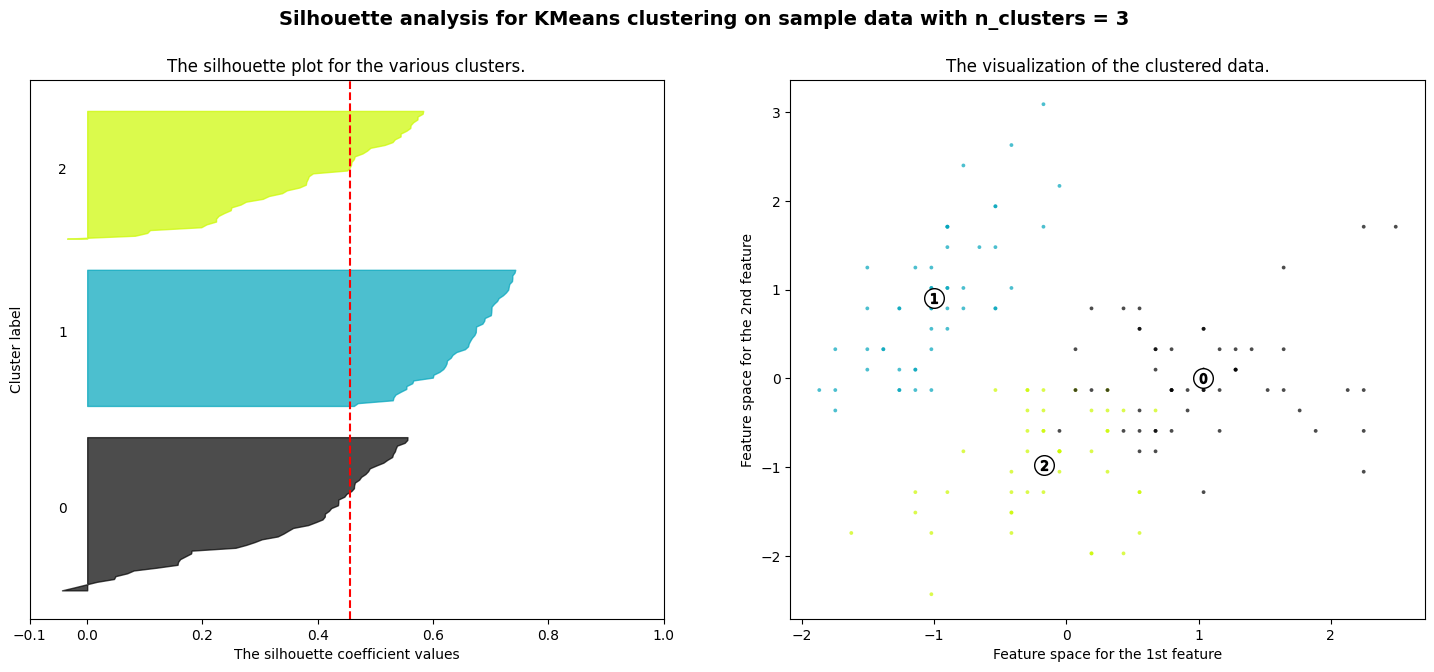

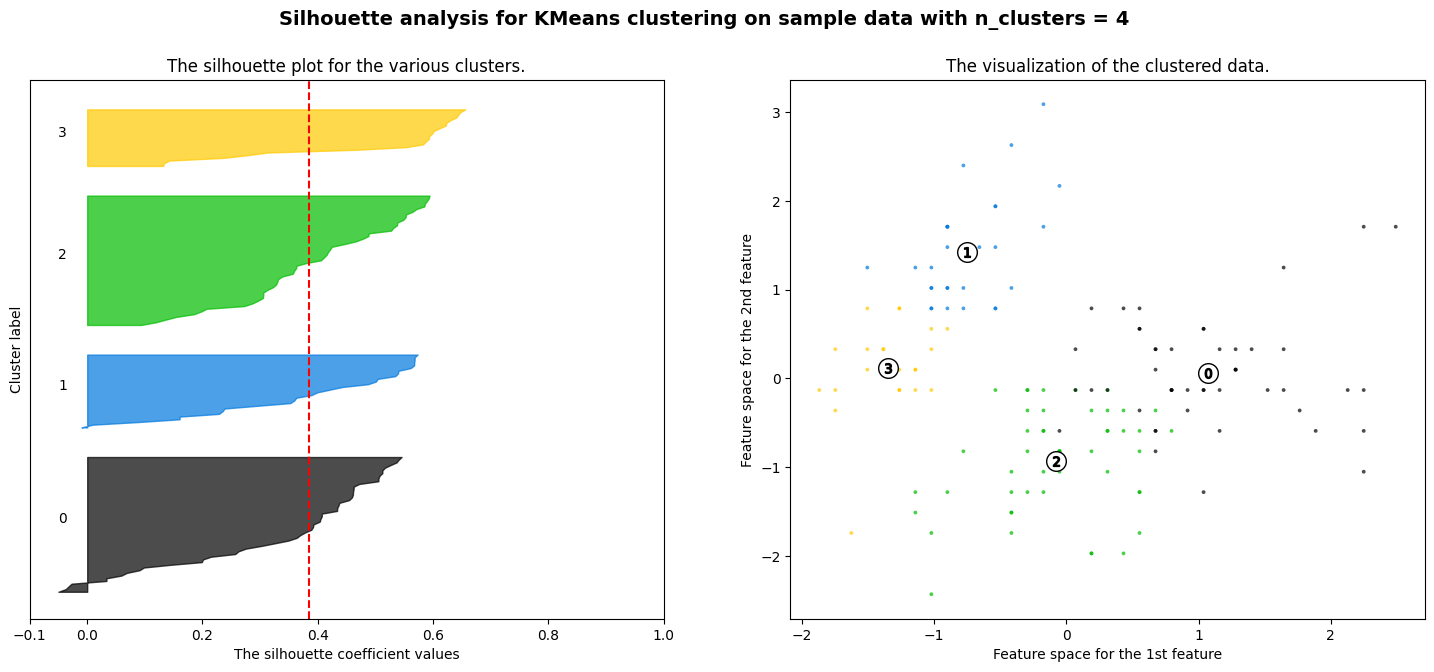

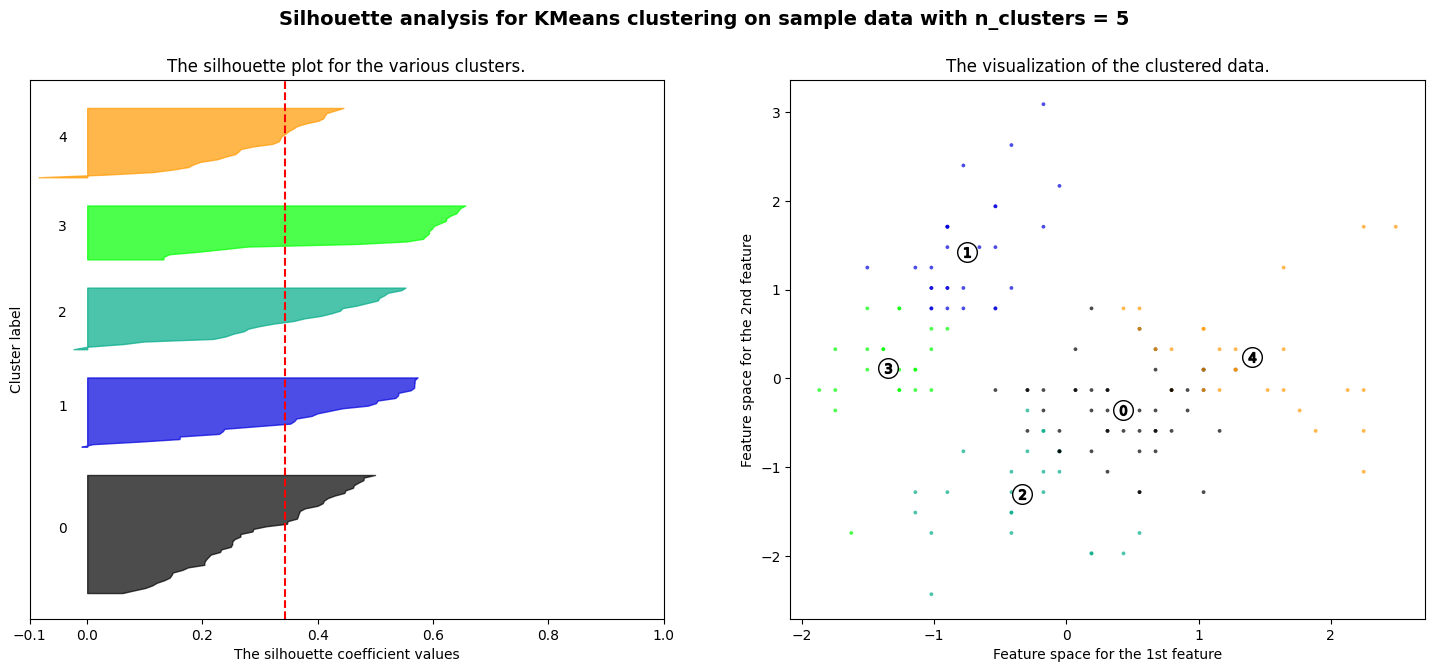

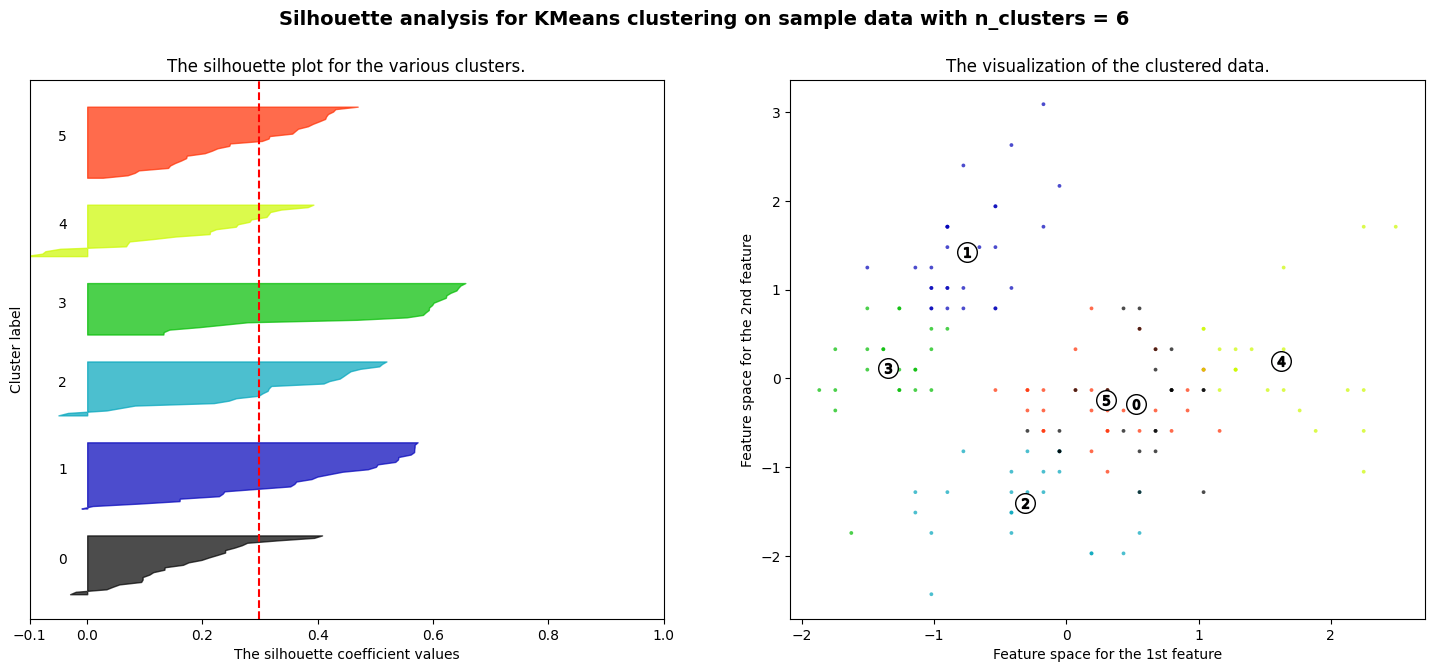

In [100]:

range_n_clusters = [2, 3, 4, 5, 6]

# Assuming iris_df2_scaled contains the standardized data
X2 = iris_df2_scaled

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X2) + (n_clusters + 1) * 10])

    # # Initialize the KMeans clusterer with the specified number of clusters
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed by KMeans
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X2[:, 0], X2[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    # General title for the entire plot to indicate KMeans analysis
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
# The elbow method and silhouette graph techniques are two methods commonly used to evaluate the optimal number of clusters in a clustering analysis. 
# clusters in a clustering analysis, particularly with algorithms such as K-means. These techniques are used to analyse the quality 
# of the clusters formed and determine the most appropriate number of clusters. Here is an explanation of the logic behind these methods:

##1. Graph of the elbow (Elbow Method)


    # Logic :

        # The Elbow Graph is a method based on inertia (or the sum of the squared distances of points from the centre of their cluster). Inertia measures 
        # the cohesion of clusters, i.e. how close the points within the same cluster are to each other.
        # As the number of clusters increases, total inertia decreases because the points are closer to the centre of their cluster. 
        # However, there comes a point at which adding new clusters no longer significantly reduces inertia.
        # The aim is to identify this point where the reduction in inertia begins to slow significantly, forming an ‘elbow’ in the graph. 
        # This point indicates the optimal number of clusters to retain.


    # How to use it :

        # On the graph, the x-axis represents the number of clusters (k), and the y-axis represents the inertia.
        # The ‘kink’ in the graph is the point where inertia stops decreasing drastically as the number of clusters increases.
        # This elbow point is considered to be the optimal number of clusters because it represents the best compromise between the internal cohesion of the clusters and the simplification of the model. 
        # and model simplification.


    # Advantages and limitations :

        # Advantage: Simple to interpret and easy to implement.
        # Limitation: In some cases, the elbow may not be clearly visible, making it difficult to identify the optimal number of clusters.


## 2. Silhouette Plot


    # Logic :
        # Silhouette analysis is a method based on the quality of clusters. It measures how well each data point is assigned to its 
        # cluster relative to other clusters.


    # The silhouette value for each point is between -1 and 1:

        # A value close to 1 indicates that the point is correctly assigned to its cluster.
        # A value close to 0 means that the point is on the border or boundary between two clusters.
        # A negative value close to -1 suggests that the point has been assigned to the wrong cluster.


    # How to use it :

        # In a silhouette graph, the x-axis represents the silhouette coefficient (ranging from -1 to 1), and the y-axis 
        # shows the points belonging to each cluster.
        # Each cluster is represented by an area on the graph, and the height of this area corresponds to the number of points in the cluster.
        # A high average silhouette score for the whole data set indicates that the clusters are well separated and distinct from each other.


    # Advantages and limitations :

        # Advantage: Provides a quantitative measure of cluster quality, which helps to identify the optimal number of clusters.
        # Limitation: The method can be sensitive to the shape of clusters, and a high silhouette score is not always guaranteed if clusters are 
        # are irregular.


## Comparison of the two techniques

    # Objective
        # Elbow method: Minimise inertia (intra-cluster distance)
        # Silhouette method: Maximise the quality of cluster separation

    # Type of measurement
        # Elbow method: Cohesion of points in each cluster
        # Separation and relative density of clusters

    # Ease of interpretation
        # Elbow method: The elbow can sometimes be difficult to identify
        # Silhouette method: The silhouette score gives a direct measure of quality

    # Results
        # Elbow method: Depends mainly on internal cohesion
        # Silhouette method: Takes into account distance to other clusters


## Conclusion

    # The elbow graph is ideal for understanding the inertia and internal cohesion of clusters. It is easy to interpret when the elbow 
    # is clearly visible.

    # Silhouette graph: This is a more accurate way of assessing the quality of clusters, as it considers both the internal cohesion and the separation 
    # between clusters. It is a more robust technique for confirming the quality of clustering.

    # These two techniques are often used together to validate clustering results and determine the optimal number of clusters to use.